In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Rainfall_1901_2016.csv')

In [3]:
df.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


In [4]:
df['Date']=df[' Year'].astype(str)+df['Month'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  1392 non-null   float64
 1    Year            1392 non-null   int64  
 2   Month            1392 non-null   object 
 3   Date             1392 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 43.6+ KB


In [6]:
df.drop(['Month'],axis=1,inplace=True)

In [7]:
df.drop([' Year'],axis=1,inplace=True)

In [8]:
data=df.rename(columns={'Rainfall - (MM)':'Rainfall'})
data

,Rainfall,Date
0,40.42580,1901January
1,12.30220,1901February
2,25.51190,1901March
3,14.29420,1901April
4,38.30460,1901May
...,...,...
1387,60.60610,2016August
1388,13.76940,2016September
1389,1.07552,2016October
1390,2.88480,2016November


In [9]:
data

,Rainfall,Date
0,40.42580,1901January
1,12.30220,1901February
2,25.51190,1901March
3,14.29420,1901April
4,38.30460,1901May
...,...,...
1387,60.60610,2016August
1388,13.76940,2016September
1389,1.07552,2016October
1390,2.88480,2016November


In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%B')
print (data)

      Rainfall       Date
0     40.42580 1901-01-01
1     12.30220 1901-02-01
2     25.51190 1901-03-01
3     14.29420 1901-04-01
4     38.30460 1901-05-01
...        ...        ...
1387  60.60610 2016-08-01
1388  13.76940 2016-09-01
1389   1.07552 2016-10-01
1390   2.88480 2016-11-01
1391   7.82298 2016-12-01

[1392 rows x 2 columns]


In [33]:
data

,Rainfall,Date
0,40.42580,1901-01-01
1,12.30220,1901-02-01
2,25.51190,1901-03-01
3,14.29420,1901-04-01
4,38.30460,1901-05-01
...,...,...
1387,60.60610,2016-08-01
1388,13.76940,2016-09-01
1389,1.07552,2016-10-01
1390,2.88480,2016-11-01


In [34]:
data.isna().sum()

Rainfall    0
Date        0
dtype: int64

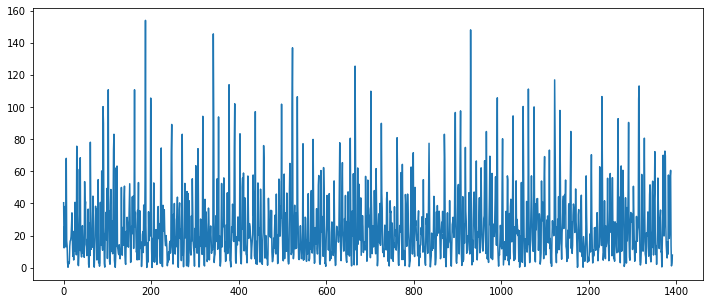

In [35]:
data['Rainfall'].plot(figsize=(12,5));

In [36]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(data['Rainfall'],autolag = 'AIC')
df_test

(-6.695889008362779,
 4.000735413147937e-09,
 23,
 1368,
 {'1%': -3.435139190725917,
  '5%': -2.8636550704859007,
  '10%': -2.5678960623995417},
 11800.671679806295)

In [37]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [38]:
stepwise_fit = auto_arima(data['Rainfall'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1392
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -6075.834
Date:                Thu, 09 Dec 2021   AIC                          12165.669
Time:                        16:50:55   BIC                          12202.338
Sample:                             0   HQIC                         12179.381
                               - 1392                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.1773      0.937     25.805      0.000      22.341      26.014
ar.L1          0.9985      0.002    405.029      0.000       0.994       1.003
ar.L2         -0.9969      0.002   -449.543      0.000      -1.001      -0.993
ma.L1         -0.7936      0.026    -30.880      0.000      -0.844      -0.743
ma.L2          0.7988      0.025     31.953      0.000       0.750       0.848
ma.L3          0.1809      0.025      7.228      0.000       0.132       0.230
sigma2       372.2367     10.794     34.485      0.000     351.081     393.393
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              2094.65
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.65
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
print(df.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1392, 2)
(1362, 2) (30, 2)
Rainfall                30.8147
Date        2014-07-01 00:00:00
Name: 1362, dtype: object Rainfall                7.82298
Date        2016-12-01 00:00:00
Name: 1391, dtype: object


In [49]:
from statsmodels.tsa.arima.model import ARIMA 
model = ARIMA(data['Rainfall'], order=(2,0,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:                 1392
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -6065.922
Date:                Thu, 09 Dec 2021   AIC                          12145.844
Time:                        16:53:25   BIC                          12182.513
Sample:                             0   HQIC                         12159.556
                               - 1392                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2144      0.824     30.612      0.000      23.600      26.829
ar.L1          1.0003      0.000   2202.853      0.000       0.999       1.001
ar.L2         -0.9999      0.000  -3328.012      0.000      -1.000      -0.999
ma.L1         -0.8083      0.038    -21.445      0.000      -0.882      -0.734
ma.L2          0.8013      0.058     13.922      0.000       0.688       0.914
ma.L3          0.1971      0.026      7.614      0.000       0.146       0.248
sigma2       349.2137     21.704     16.090      0.000     306.674     391.753
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              1906.55
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.60
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
start=len(train)
print(start)
print(end)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

1362
1391
1362    34.610404
1363    40.611538
1364    27.979440
1365    15.428464
1366     7.951250
1367    20.849131
1368    32.610754
1369    38.369331
1370    28.761295
1371    21.837649
1372    10.949619
1373    21.686242
1374    38.018582
1375    48.473856
1376    34.276323
1377    12.066386
1378     9.169939
1379    20.292410
1380    34.006985
1381    38.333269
1382    24.521210
1383    20.257498
1384     8.429696
1385    21.792186
1386    36.984391
1387    45.712210
1388    33.292621
1389     9.909122
1390     6.954725
1391    19.388111
Name: predicted_mean, dtype: float64


<AxesSubplot:>

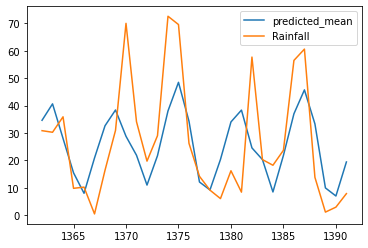

In [51]:
pred.plot(legend='ARIMA Predictions')
test['Rainfall'].plot(legend=True)

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Rainfall']))
print(rmse)

16.815400704556517


In [54]:
model2=ARIMA(data['Rainfall'],order=(2,0,3))
model2=model2.fit()
data.tail()

,Rainfall,Date
1387,60.60610,2016-08-01
1388,13.76940,2016-09-01
1389,1.07552,2016-10-01
1390,2.88480,2016-11-01
1391,7.82298,2016-12-01


In [68]:
index_future_dates=pd.date_range(start='2017-01-01',end='2017-02-01')
#print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+31,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2017-01-01    34.490312
2017-01-02    41.824010
2017-01-03    30.276569
2017-01-04    13.670463
2017-01-05     8.605965
2017-01-06    20.144068
2017-01-07    36.748993
2017-01-08    41.821646
2017-01-09    30.292881
2017-01-10    13.689143
2017-01-11     8.608340
2017-01-12    20.127765
2017-01-13    36.730312
2017-01-14    41.819260
2017-01-15    30.309174
2017-01-16    13.707825
2017-01-17     8.610736
2017-01-18    20.111483
2017-01-19    36.711630
2017-01-20    41.816853
2017-01-21    30.325446
2017-01-22    13.726508
2017-01-23     8.613155
2017-01-24    20.095222
2017-01-25    36.692946
2017-01-26    41.814424
2017-01-27    30.341697
2017-01-28    13.745193
2017-01-29     8.615595
2017-01-30    20.078980
2017-01-31    36.674260
2017-02-01    41.811973
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

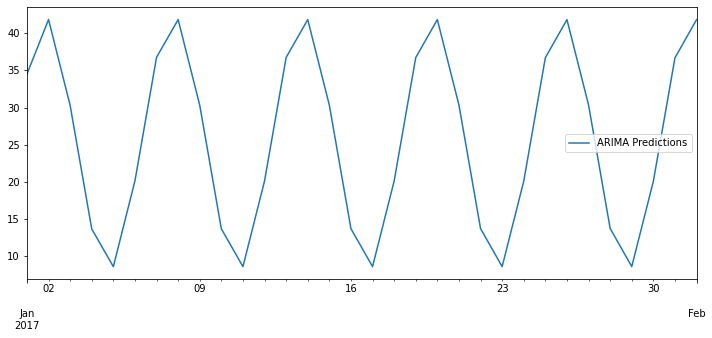

In [69]:
pred.plot(figsize=(12,5),legend=True)